T.A. Maryam Azhin, 
Department of Chemical and Materials Engineering, University of Alberta

**Predicting conversion in non-ideal reactors (part 2)**

**Q 1. (50 pts)**
For the laminar flow reactor of problem 2 in Assignment 2 (volume$=5 L$, constant fluid flow rate of $2.5
L/s$, 2nd order constant density reaction with $kC_{A0}=15 s^{-1}$), predict the minimum possible conversion in the
reactor (i.e. use the maximum mixedness model. Use $\Delta \lambda=0.01$ and a maximum time of $20 s$). Confirm that
the conversion is less than the maximum possible conversion calculated using the segregated flow model from Assignment 2, Q 2.

**Answer**

RTD is given by laminar flow reactor model:

$E(t)=0\;\;\;\;\; at \;\;\;\; t<1\;s$

$E(t)=\frac{2}{t^3}\;\;\;\; at \;\;\;\; t\geq 1\;s$

We need $F(t)$. 

$F(t)=0\;\;\;\; at \;\;\;\; t<1\;s$

$F(t)=\int_0^tE(t)dt=2\int_1^t \frac{dt}{t^3}=\frac{2}{-2}(\frac{1}{t^2}-\frac{1}{1})=1-\frac{1}{t^2}\;\;\;\; at \;\;\;\; t\geq 1\;s$
 
model: $\frac{dX}{d \lambda}=\frac{r_A}{C_{A0}}+\frac{E(\lambda)}{1-F(\lambda)}X$ 

$2^{nd}$ order $r_A=-kC_{A0}^2(1-X)^2$

By introducing the reaction law to MM model: $\frac{dX}{d \lambda}=-KC_{A0}(1-X)^2+\frac{E(\lambda)X}{1-F(\lambda)}$

Euler method evaluation:

$\frac{X_{i+1}-X_i}{\lambda_{i+1}-\lambda_{i}}=[-kC_{A0}(1-X_{i})^2+X_{i}\frac{E(\lambda_i)}{1-F(\lambda_i)}]$

$\Delta \lambda=\lambda_{i+1}-\lambda_{i}$, where $\Delta \lambda$ is a negative value

$X_{i+1}=X_{i}+\Delta \lambda [-kC_{A0}(1-X_{i})^2+X_{i}\frac{E(\lambda_i)}{1-F(\lambda_i)}]$

$\Delta \lambda=-0.01\;s$

Find $X$ at time $0$ is $0.946(<0.965$ preicted by seregated model).

Values at $5s$: $E(t)=0.016$, $F(t)=0.96$, $X=0.852$

Text(0.5, 0, 'Time, s')

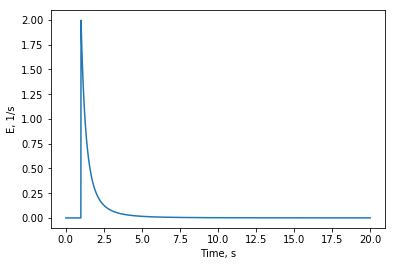

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0.,20,2000)
E = np.zeros(len(t))
kCA0 = 15 #S^-1
del_lam = -0.01  #𝑠
V = 5 #L
Q0 = 2.5 #L/s
Tau = V/Q0

for i in range(0,len(t)):
    if  t[i]>(Tau/2):
        E[i]=(pow(Tau,2)/2)/pow(t[i],3)
    else:
        E[i]=0   

plt.plot(t,E)
plt.ylabel('E, 1/s')
plt.xlabel('Time, s')

Text(0.5, 0, 'Time, s')

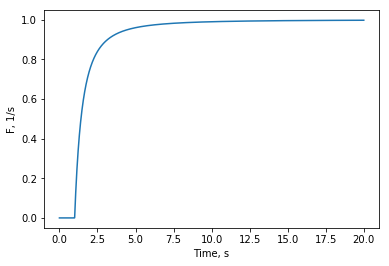

In [4]:
F=np.zeros(len(t))

for i in range(0,len(t)):
    if  t[i]>(Tau/2):
        F[i]=1-pow(Tau,2)/(4*pow(t[i],2))
    else:
        F[i]=0 

import matplotlib.pyplot as plt
plt.plot(t,F)
plt.ylabel('F, 1/s')
plt.xlabel('Time, s')

0.946 Conversion


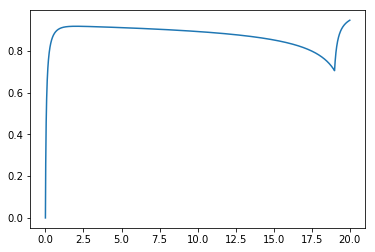

In [5]:
xplot=np.zeros(len(t))
X=0

for i in range(1,len(t)):
        Xnew=X+del_lam*(-kCA0*pow((1.-X),2)+X*E[len(E)-1-i]/(1.-F[len(E)-1-i])) # explicit Euler
        X=Xnew
        xplot[i]=Xnew
                                                    
plt.plot(t,xplot)
#xplot[-1]
print ("{0:.3f}".format(xplot[-1]),'Conversion')

------------------------------------------------------------

**Q2. (50 pts)**
A second-order gas-phase reaction $2A \rightarrow B+C$ is to be carried out isothermally in a tubular reactor of $0.15 m$ i.d. and $1 m$ length. The entering flow rate of pure $A$ at the reaction conditions are $0.01 m^3/h$ and $2.7 mol/h$. The rate constant with respect to $A$ is $0.007 m^3/(mol.h)$.
The mean residence time in the reactor was measured to be $0.48 h$, and the variance of the RTD was $0.067 h^2$.

a) Predict conversion using tanks-in-series model.

b) calculate the reactor Peclet number and the axial. Does dispersion affect the reactor performance, i.e. should an axial dispersion model be used for accurate modeling? Calculate the axial dispersion coefficient in $m^2/s$.

**Answer**

number of tanks : $n=\frac{\tau^2}{\sigma^2}=\frac{0.48^2}{0.067}=3.43$ round to the nearest integer.
$n=3$

$\tau$ in each tank: $\frac{\tau}{n}=\frac{0.48}{3}=0.16\;h$

CSTR mole balance : $F_{A0}-F_A=-r_A.V$
$(Q=Q_0)$

$C_{A0}-C_{A}=kC_A^2\tau$

Quadratic root (only +)

$C_A=\frac{-1+(1+4k\tau C_{A0})^{0.5}}{2\tau.k}$


Tank 1: $C_{A0}=270\;\;\frac{mol}{m^3}$, $\tau=0.16$, $k=0.07$
        $C_{A1}=217.175\;\;\frac{mol}{m^3}$

Tank 2: $C_{A1}=217.175\;\;\frac{mol}{m^3}$, $\tau=0.16$, $k=0.07$
        $C_{A2}=180.632\;\;\frac{mol}{m^3}$

Tank 3: $C_{A2}=180.632\;\;\frac{mol}{m^3}$, $\tau=0.16$, $k=0.07$
        $C_{A3}=154.052\;\;\frac{mol}{m^3}$

Conversion (Q constant) $X=\frac{C_{A0}-C_{A3}}{C_{A0}}=\frac{270-154.052}{270}*100=42.9\;\%$



In [6]:
import math

Q0 = 0.01 #𝑚3/ℎ
FA0 = 2.7 #𝑚𝑜𝑙/ℎ
var = 0.067
Tau = 0.48
k = 0.007 #m^3/(mol.h)
n=pow(Tau,2)/var # number of tanks :round to the nearest integer.
N=math.floor(n)
print('number of tanks=',N)

#tau in each tank: 
tau=Tau/N
print('tau in each tank=', tau)

#CSTR mole balance : $F_{A0}-F_A=-r_A.V$
CA0 = FA0/Q0
CA1 = (-1 + pow((1.+4.*k*tau*CA0),0.5))/(2*tau*k)
print('Tank 1: CA1=', "{0:.3f}".format(CA1),'mol/m^3',)
CA2 = (-1 + pow((1.+4.*k*tau*CA1),0.5))/(2*tau*k)
print('Tank 2: CA2=',"{0:.3f}".format(CA2), 'mol/m^3')
CA3 = (-1 + pow((1.+4.*k*tau*CA2),0.5))/(2*tau*k)
print('Tank 3: CA3=',"{0:.3f}".format(CA3), 'mol/m^3')
#Conversion (Q constant) 
X=(CA0-CA3)/CA0
print('conversion',"{0:.3f}".format(X))


number of tanks= 3
tau in each tank= 0.16
Tank 1: CA1= 217.175 mol/m^3
Tank 2: CA2= 180.632 mol/m^3
Tank 3: CA3= 154.052 mol/m^3
conversion 0.429


**2-b)**

$\frac{\sigma^2}{\bar{t}^2}=\frac{2}{Pe_r}-\frac{2}{Pe_r^2}(1-e^{-Pe_r})$


$\frac{0.067}{0.48^2}=\frac{2}{Pe_r}-\frac{2}{Pe_r^2}(1-e^{-Pe_r})$


$Pe_r=1.63$


Yes dispersion affects the reactor performance $(Pe_r<100)$

$Da=\frac{U.L}{Pe_r}=\frac{(Q/A_c).L}{Pe_r}=\frac{0.01*4*1}{\pi *0.15^2*1.63}= 0.347\;\;\frac{m^2}{h}$

In [7]:
from scipy.optimize import fsolve

def func(Pe):
    sigma2=0.067
    tau=0.48
    return sigma2/pow(tau,2)-2/Pe+2/(pow(Pe,2)*(1-math.exp(-Pe)))

Pe_r = fsolve(func, 0.1)
print('Peclet number',Pe_r)

Peclet number [1.62998018]


In [8]:
ID=0.15
L=1
V=3.14*ID*ID*L/4

Da=(Q0/V)*L*L/Pe_r
print('Da=',Da)

Da= [0.34734856]
